In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from helper import Helper as help
import ast

In [2]:
sparse_irrational_data = pd.read_csv('../sparse_lam_data/j_sparseirrational_dist.csv')
sparse_gaussian_data = pd.read_csv('../sparse_lam_data/j_sparsenorm_dist.csv')
sparse_rademacher_data = pd.read_csv('../sparse_lam_data/j_sparserademacher_dist2.csv')
print(sparse_irrational_data['Lambda'].unique())
data_list = [sparse_irrational_data, sparse_gaussian_data, sparse_rademacher_data]

[  1  10  25  45  70 100   0  -1]


In [3]:
names = ['sparse_irrational', 'sparse_gaussian', 'sparse_rademacher']

rel_alphas = []
gr_alphas = []

i = 0
print("Reluctant: \n")
for data in data_list:
    p_vals = np.sort(data['p'].unique())
    for p in p_vals:
        df = data[(data['Lambda'] == -1) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        rel_alphas.append(a)
        print(names[i], "P = ", p, ": ", a)
    i += 1

i = 0
print("\nGreedy: \n")
for data in data_list:
    p_vals = np.sort(data['p'].unique())
    for p in p_vals:
        df = data[(data['Lambda'] == 0) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        gr_alphas.append(a)
        print(names[i], "P = ", p, ": ", a)
    i += 1

Reluctant: 

sparse_irrational P =  0.3 :  2.008650995189576
sparse_irrational P =  0.4 :  1.9887413074901348
sparse_irrational P =  0.5 :  2.006703300888281
sparse_irrational P =  0.6 :  1.9912029522656745
sparse_irrational P =  0.7 :  1.9809078448184916
sparse_irrational P =  0.75 :  1.9657170145168712
sparse_irrational P =  0.8 :  1.9676401249562114
sparse_irrational P =  0.9 :  1.8778353845679363
sparse_gaussian P =  0.1 :  2.0859951900925457
sparse_gaussian P =  0.2 :  2.0922883572282354
sparse_gaussian P =  0.25 :  2.096674742273234
sparse_gaussian P =  0.3 :  2.090951953907229
sparse_gaussian P =  0.4 :  2.101961040449205
sparse_gaussian P =  0.5 :  2.0976609636529213
sparse_gaussian P =  0.6 :  2.091229270571972
sparse_gaussian P =  0.7 :  2.079835704884851
sparse_gaussian P =  0.75 :  2.0538101320373583
sparse_gaussian P =  0.8 :  2.0294910302272546
sparse_gaussian P =  0.9 :  1.8584274101188247
sparse_rademacher P =  0.1 :  1.6747203771824175
sparse_rademacher P =  0.2 :  1.6

[0.3  0.4  0.5  0.6  0.7  0.75 0.8  0.9 ]
[0.1  0.2  0.25 0.3  0.4  0.5  0.6  0.7  0.75 0.8  0.9 ]
[0.1  0.2  0.25 0.3  0.4  0.5  0.6  0.7  0.75 0.8  0.9 ]


Text(0.5, 1.0, 'β vs p for Greedy and Reluctant Algorithms')

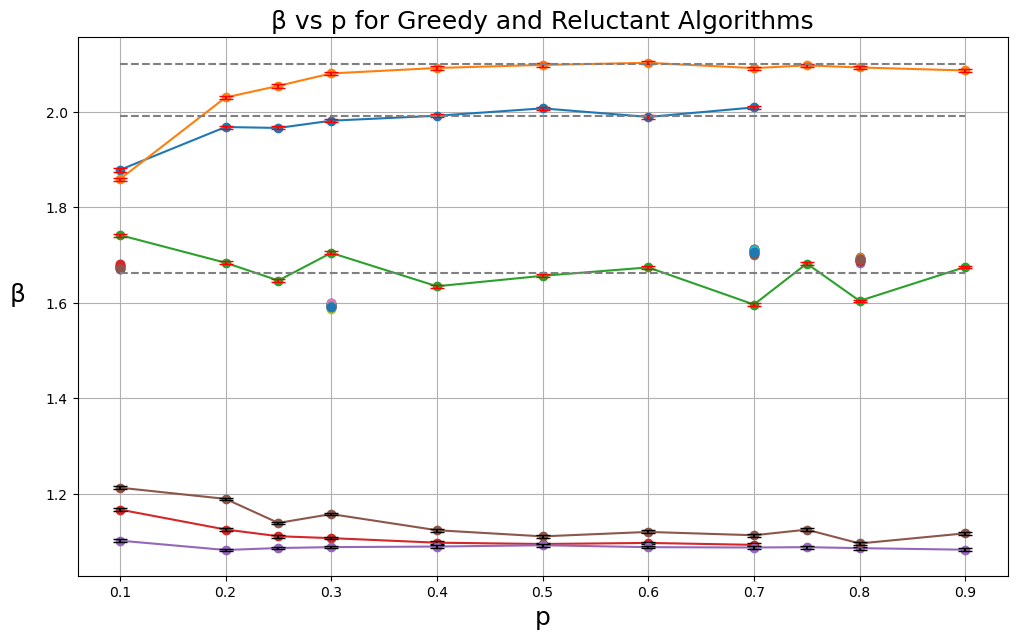

In [8]:
names = ['sparse_irrational', 'sparse_gaussian', 'sparse_rademacher']
colors = ['blue', 'red', 'green']

rel_alphas = []
rel_err = []
gr_alphas = []
gr_err = []

fig, axes = plt.subplots(1, 1, figsize=(12, 7))

i = 0
# print("Reluctant: \n")
for data in data_list:
    rel_alphas = []
    rel_err = []
    p_vals = np.sort(data['p'].unique())
    print(p_vals)
    for p in p_vals:
        df = data[(data['Lambda'] == -1) & (data['p'] == p)]
        for row in df.itertuples():
            val = row.log_time
            if isinstance(val, str):
                try:
                    ast.literal_eval(val)
                except Exception as e:
                    print("Problematic value:", val)
                    print("Error:", e)
                    break
        a, a_err = help.get_alpha_from_log_time(df)
        rel_alphas.append(a)
        rel_err.append(a_err)
    axes.plot(1-p_vals, rel_alphas, marker = 'o', label=f'{names[i]}: Reluctant dynamics')
    axes.errorbar(1-p_vals, rel_alphas, yerr=rel_err, marker=' ', linestyle=' ', capsize=5, color='red') # label='Reluctant Error'
    i += 1

i = 0
# print("\nGreedy: \n")
for data in data_list:
    gr_alphas = []
    gr_err = []
    p_vals = np.sort(data['p'].unique())
    for p in p_vals:
        df = data[(data['Lambda'] == 0) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        gr_alphas.append(a)
        gr_err.append(a_err)
    axes.plot(1-p_vals, gr_alphas, marker = 'o', label=f'{names[i]}: Greedy dynamics')
    axes.errorbar(1-p_vals, gr_alphas, yerr=gr_err, marker=' ', linestyle=' ', capsize=5, color='black') # label = 'Greedy Error'
    i += 1

p_03_data = pd.read_csv("../sparse_rel_data/merged_runs_03.csv")
p_01_data = pd.read_csv("../sparse_rel_data/merged_runs_01.csv")
p_07_data = pd.read_csv("../sparse_rel_data/merged_runs_07.csv")
p_08_data = pd.read_csv("../sparse_rel_data/merged_runs_08.csv")


i = 0
# print("Reluctant: \n")
data_new_list = [p_03_data, p_01_data, p_07_data, p_08_data]
p_new_list = [0.3, 0.1, 0.7, 0.8]
for j in range(len(data_new_list)):
    for i in range(25):
        data = data_new_list[j][data_new_list[j]["run"]==i+1]
        rel_alphas = []
        rel_err = []
        a, a_err = help.get_alpha_from_log_time(data)
        rel_alphas.append(a)
        rel_err.append(a_err)
        axes.plot(p_new_list[j], rel_alphas, marker = 'o')

# Gaussian
axes.hlines(2.0988161482037477, 0.1, 0.9, color = 'gray', linestyles = '--')
# irrational
axes.hlines(1.989911570595115, 0.1, 0.9, color = 'gray', linestyles = '--')
# rademacher
axes.hlines(1.66295077558983, 0.1, 0.9, color = 'gray', linestyles = '--')

axes.set_xlabel('p', fontsize=18)
axes.set_ylabel('β', fontsize=18, labelpad=20, rotation = 0)
axes.grid()
axes.set_title('β vs p for Greedy and Reluctant Algorithms', fontsize = 18)
#axes.legend()
